In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("./df4.pkl")
df

,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Morning,departure_time_Night,stops_one,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy,duration,days_left,price
3,0,0,0,1,0,0,1,1,0,0,0,0,0,1,2.25,1,5955
4,0,0,0,1,0,0,1,0,0,0,1,0,0,1,2.33,1,5955
5,0,0,0,1,0,0,1,1,0,0,0,0,0,1,2.33,1,5955
6,0,0,0,1,0,0,1,0,0,0,1,0,0,1,2.08,1,6060
7,1,0,0,0,0,0,1,0,0,1,0,0,0,1,2.17,1,6060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211965,1,0,0,0,0,1,0,0,0,0,0,1,1,0,7.58,49,59033
211966,0,1,0,0,0,1,0,0,0,0,0,1,1,0,12.83,49,59033
211970,0,1,0,0,0,1,0,1,0,0,0,0,1,0,6.75,49,59929
211971,0,1,0,0,0,1,0,0,0,0,0,1,1,0,14.08,49,59929


In [3]:
x = df.iloc[:,:-1]
y = df["price"]

In [4]:
import sklearn 
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)
print(selection.feature_importances_)

[2.00441844e-03 6.70904406e-03 2.62413232e-03 9.84862265e-04
 1.57053370e-03 2.11594722e-02 2.91389814e-02 1.21153978e-03
 1.24337951e-05 9.61675784e-04 1.21365826e-03 5.37704658e-03
 4.57778963e-01 3.89956573e-01 4.79475857e-02 3.13490795e-02]


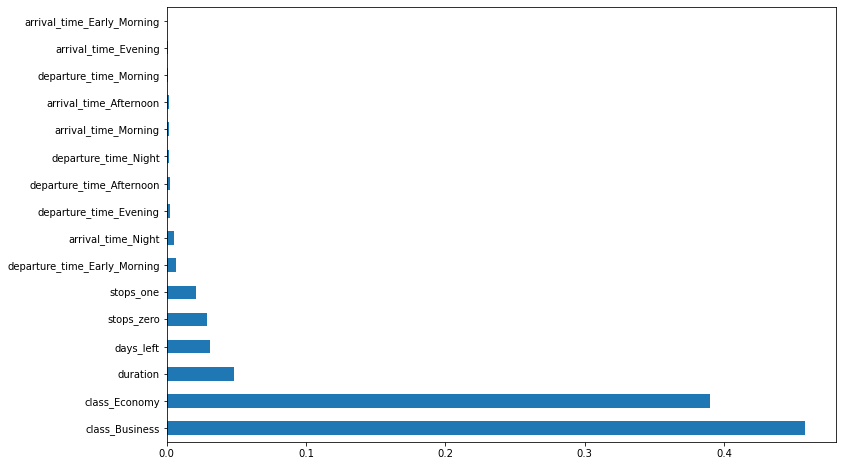

In [5]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [6]:
X=df[["class_Economy","class_Business","stops_zero","duration","stops_one","days_left","departure_time_Early_Morning","arrival_time_Night","departure_time_Afternoon","departure_time_Evening"]]
Y=df["price"]


Mean absolute error: 4970.90
Mean squared error: 45928936.32
accuracy in test dataset : 90.12203976795747
Execution time: 0.0160 seconds


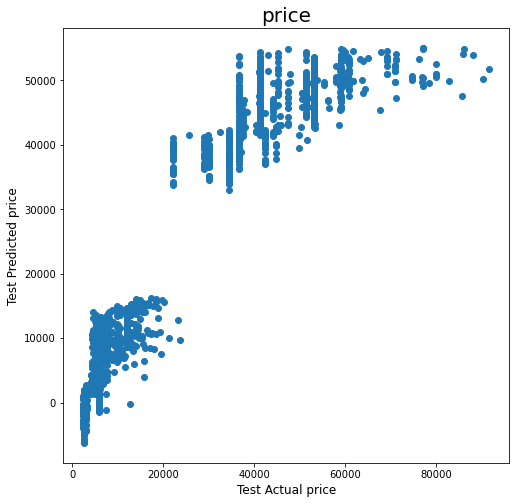

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

start_time = time.time()

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2=r2_score(y_test, y_pred)
end_time = time.time()
#r2=r2_score(y_test, y_pred)

elapsed_time = end_time - start_time

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')



print("accuracy in test dataset :",r2*100)

print(f"Execution time: {elapsed_time:.4f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)



Mean absolute error: 4865.29
Mean squared error: 42013692.40
accuracy in test dataset : 90.64161006619362
Execution time: 0.0239 seconds


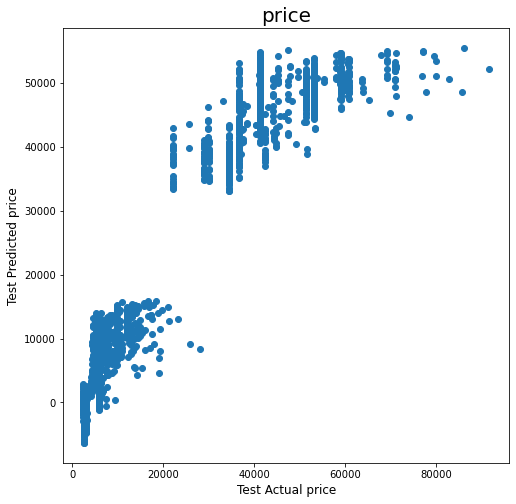

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

start_time = time.time()
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2=r2_score(y_test, y_pred)
end_time = time.time()
elapsed_time = end_time - start_time

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')




#r2=r2_score(y_test, y_pred)
print("accuracy in test dataset :",r2*100)

print(f"Execution time: {elapsed_time:.4f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)


Mean absolute error: 4939.49
Mean squared error: 45363602.47
accuracy in test dataset : 89.98235220486094
Execution time: 0.0768 seconds


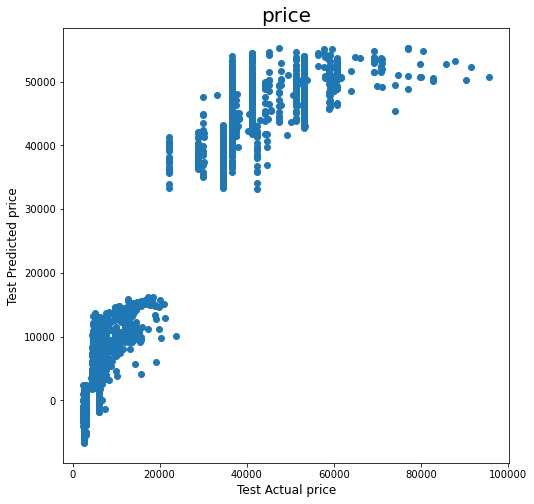

In [9]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

start_time = time.time()
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2=r2_score(y_test, y_pred)
end_time = time.time()
elapsed_time = end_time - start_time

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')



print("accuracy in test dataset :",r2*100)
print(f"Execution time: {elapsed_time:.4f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)


Mean absolute error: 4922.88
Mean squared error: 44495743.54
accuracy in test dataset : 90.21283707348326
Execution time: 0.0180 seconds


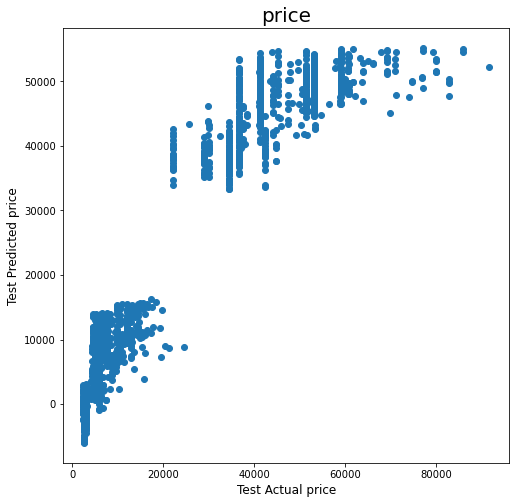

In [10]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

start_time = time.time()
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2=r2_score(y_test, y_pred)
end_time = time.time()
elapsed_time = end_time - start_time

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')



print("accuracy in test dataset :",r2*100)
print(f"Execution time: {elapsed_time:.4f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)


Mean absolute error: 2269.36
Mean squared error: 28302025.15
accuracy in test dataset : 93.84189309939426
Execution time: 0.0160 seconds


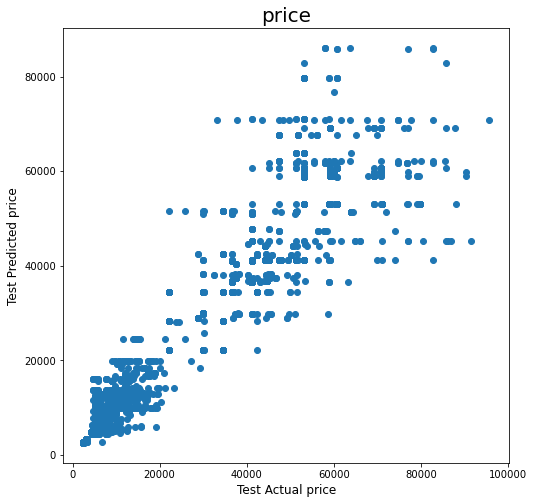

In [11]:
############################################
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.90)

start_time = time.time()
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2=r2_score(y_test, y_pred)
end_time = time.time()
elapsed_time = end_time - start_time




mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')

print("accuracy in test dataset :",r2*100)
print(f"Execution time: {elapsed_time:.4f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)



Mean absolute error: 2193.65
Mean squared error: 24788975.42
accuracy in test dataset : 94.6113936278803
Execution time: 0.0140 seconds


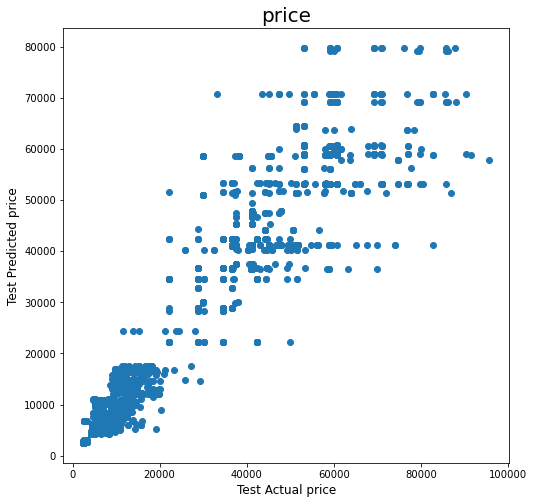

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.90)

start_time = time.time()
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2=r2_score(y_test, y_pred)
end_time = time.time()
elapsed_time = end_time - start_time

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')

print("accuracy in test dataset :",r2*100)
print(f"Execution time: {elapsed_time:.4f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)


Mean absolute error: 1573.66
Mean squared error: 13597628.16
accuracy in test dataset : 97.01991339090301
Execution time: 12.42 seconds


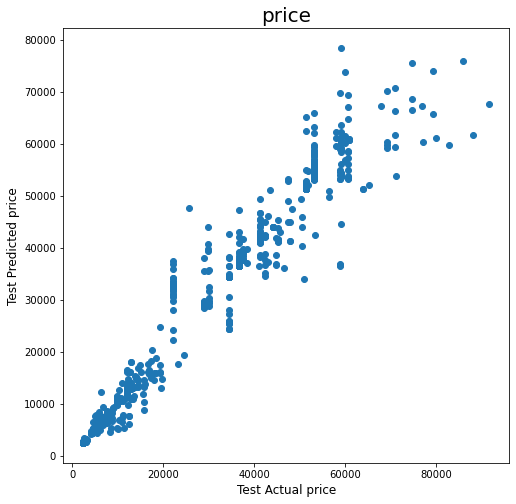

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import time
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

#start_time = time.time()
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
start_time = time.time()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2=r2_score(y_test, y_pred)
end_time = time.time()
elapsed_time = end_time - start_time

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')

print("accuracy in test dataset :",r2*100)
print(f"Execution time: {elapsed_time:.2f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)


Mean absolute error: 1864.13
Mean squared error: 16682048.61
accuracy in test dataset : 96.1608833543743
Execution time: 6.53 seconds


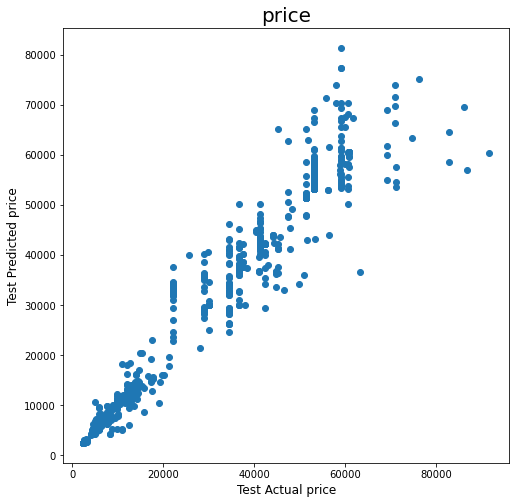

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import time
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

start_time = time.time()
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2=r2_score(y_test, y_pred)
end_time = time.time()
elapsed_time = end_time - start_time

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')

print("accuracy in test dataset :",r2*100)
print(f"Execution time: {elapsed_time:.2f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)

Mean absolute error: 4741.26
Mean squared error: 41095971.99
accuracy in test dataset : 91.02539936170803
Execution time: 0.0209 seconds


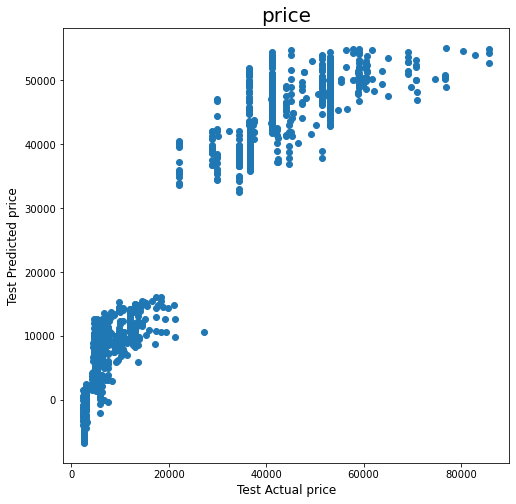

In [15]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

start_time = time.time()
model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2=r2_score(y_test, y_pred)
end_time = time.time()
elapsed_time = end_time - start_time

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')


print("accuracy in test dataset :",r2*100)
print(f"Execution time: {elapsed_time:.4f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)

Mean absolute error: 4873.59
Mean squared error: 45074779.42
accuracy in test dataset : 90.16542230943672
Execution time: 0.0189 seconds


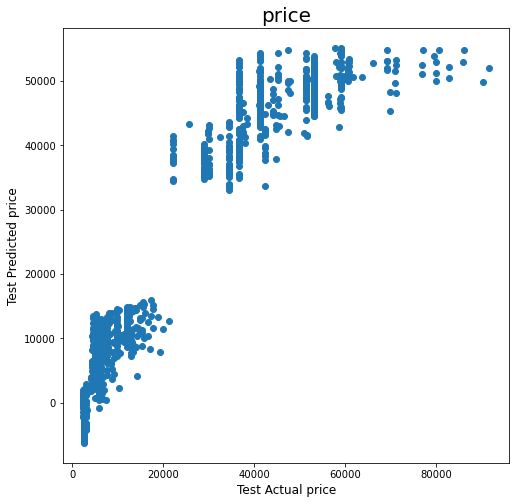

In [16]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

start_time = time.time()
model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2=r2_score(y_test, y_pred)
end_time = time.time()
elapsed_time = end_time - start_time

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')


print("accuracy in test dataset :",r2*100)
print(f"Execution time: {elapsed_time:.4f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)

[02:10:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error: 2315.24
Mean squared error: 15932822.94
accuracy in test dataset : 96.45291377247628
Execution time: 0.75 seconds


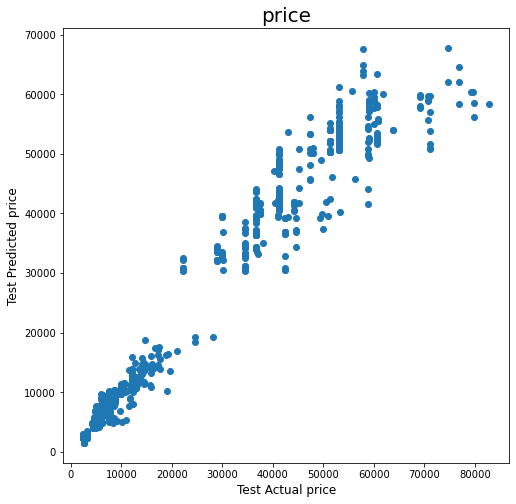

In [17]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# Convert data to DMatrix format, which is the input format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the hyperparameters for the model
params = {
    "objective": "reg:linear",  # Use linear regression
    "eta": 0.1,  # Learning rate
    "max_depth": 3,  # Maximum depth of the tree
    "subsample": 0.7,  # Subsample ratio of the training data
    "colsample_bytree": 0.7,  # Subsample ratio of the columns
    "lambda": 1.0,  # L2 regularization term
}



# Train the model on the full training set using the best number of boosting rounds
start_time = time.time()
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred= model.predict(dtest)


end_time = time.time()
r2=r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
elapsed_time = end_time - start_time

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print("accuracy in test dataset :",r2*100)
print(f"Execution time: {elapsed_time:.2f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)


[02:10:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error: 2433.81
Mean squared error: 19026038.96
accuracy in test dataset : 95.79667296476975
Execution time: 0.24 seconds


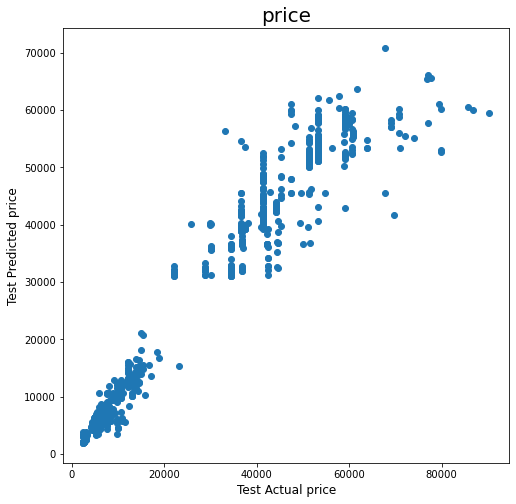

In [18]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    "objective": "reg:linear",  # Use linear regression
    "eta": 0.1,  # Learning rate
    "max_depth": 3,  # Maximum depth of the tree
    "subsample": 0.7,  # Subsample ratio of the training data
    "colsample_bytree": 0.7,  # Subsample ratio of the columns
    "lambda": 1.0,  # L2 regularization term
}




start_time = time.time()
model = xgb.train(params, dtrain, num_boost_round=100)


y_pred= model.predict(dtest)


end_time = time.time()
r2=r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
elapsed_time = end_time - start_time

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print("accuracy in test dataset :",r2*100)
print(f"Execution time: {elapsed_time:.2f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)


Mean absolute error: 23841.43
Mean squared error: 923947232.07
accuracy in test dataset : 93.90937238499978
Execution time: 0.0529 seconds


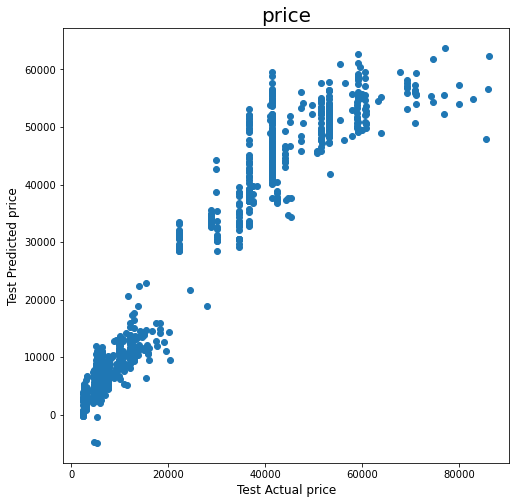

In [19]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
start_time = time.time()
# Train a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# Make predictions on the test set
y_pred = model.predict(poly.transform(X_test))
r2=r2_score(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print("accuracy in test dataset :",r2*100)
print(f"Execution time: {elapsed_time:.4f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)

Mean absolute error: 24317.21
Mean squared error: 930278026.51
accuracy in test dataset : 93.09893236119046
Execution time: 0.0279 seconds


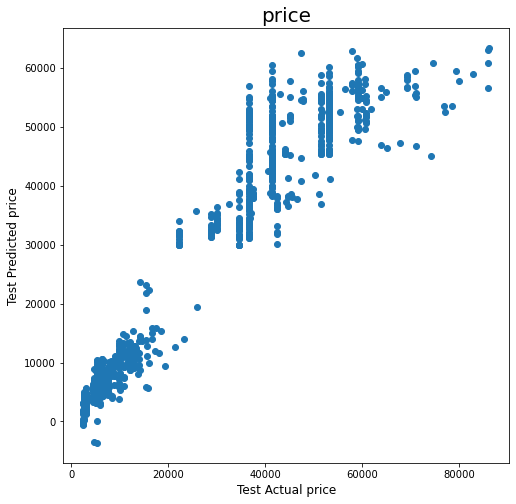

In [20]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
start_time = time.time()
# Train a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# Make predictions on the test set
y_pred = model.predict(poly.transform(X_test))
r2=r2_score(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print("accuracy in test dataset :",r2*100)
print(f"Execution time: {elapsed_time:.4f} seconds")

fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test, y_pred)